In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
X20 = pd.DataFrame({"winnings": [0, 5, 10, 15, 25, 50, 100, 1_000, 20_000, 500_000],
                      "tickets":[np.nan, 1_260_000, 1_260_000, 210_000, 159_000, 140_000, 80_000, 15, 3, 3]})
X20

,winnings,tickets
0,0,NaN
1,5,1260000.0
2,10,1260000.0
3,15,210000.0
4,25,159000.0
5,50,140000.0
6,100,80000.0
7,1000,15.0
8,20000,3.0
9,500000,3.0


In [12]:
ticket_price = 5
X20.insert(1, "net_winnings", X20.winnings - ticket_price)
X20


,winnings,net_winnings,tickets
0,0,-5,NaN
1,5,0,1260000.0
2,10,5,1260000.0
3,15,10,210000.0
4,25,20,159000.0
5,50,45,140000.0
6,100,95,80000.0
7,1000,995,15.0
8,20000,19995,3.0
9,500000,499995,3.0


In [13]:
total_tickets = 12_000_000
winning_tickets = int(X20.tickets.sum())
winning_tickets

X20.loc[0, "tickets"] = total_tickets - winning_tickets
X20.tickets = X20['tickets'].astype('int')

X20["ticket_percentage"] = X20.tickets / total_tickets * 100
X20

,winnings,net_winnings,tickets,ticket_percentage
0,0,-5,8890979,74.091492
1,5,0,1260000,10.500000
2,10,5,1260000,10.500000
3,15,10,210000,1.750000
4,25,20,159000,1.325000
5,50,45,140000,1.166667
6,100,95,80000,0.666667
7,1000,995,15,0.000125
8,20000,19995,3,0.000025
9,500000,499995,3,0.000025


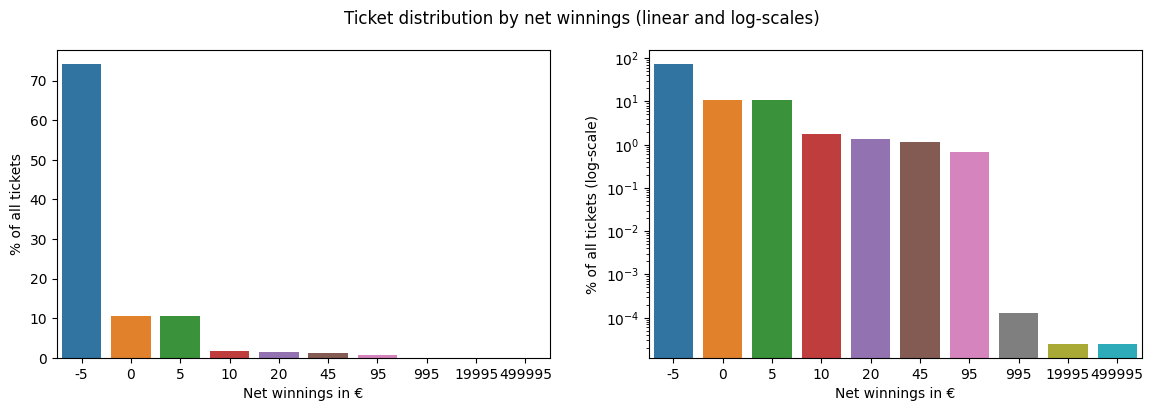

In [14]:
plt.figure(figsize=(14, 4))

ax1 = plt.subplot(1, 2, 1)
sns.barplot(data=X20, x="net_winnings", y="ticket_percentage")
ax1.set_xlabel("Net winnings in €")
ax1.set_ylabel("% of all tickets")

ax2 = plt.subplot(1, 2, 2)
sns.barplot(data=X20, x="net_winnings", y="ticket_percentage")
ax2.set_xlabel("Net winnings in €")
ax2.set_ylabel("% of all tickets (log-scale)")
ax2.set_yscale("log")

plt.suptitle("Ticket distribution by net winnings (linear and log-scales)")
plt.show()

In [15]:
X20["total_net_winnings"] = X20.net_winnings * X20.tickets
X20

,winnings,net_winnings,tickets,ticket_percentage,total_net_winnings
0,0,-5,8890979,74.091492,-44454895
1,5,0,1260000,10.500000,0
2,10,5,1260000,10.500000,6300000
3,15,10,210000,1.750000,2100000
4,25,20,159000,1.325000,3180000
5,50,45,140000,1.166667,6300000
6,100,95,80000,0.666667,7600000
7,1000,995,15,0.000125,14925
8,20000,19995,3,0.000025,59985
9,500000,499995,3,0.000025,1499985


In [16]:
X20[["tickets", "ticket_percentage", "total_net_winnings"]].sum()

tickets               12000000.0
ticket_percentage          100.0
total_net_winnings   -17400000.0
dtype: float64

In [17]:
average_ticket_net_winnings = X20["total_net_winnings"].sum() / total_tickets
percentage = -average_ticket_net_winnings / ticket_price
print(average_ticket_net_winnings, f"€, soit {percentage:.2%} du prix du ticket est perdu en moyenne")

-1.45 soit 29.00% du prix du ticket part à la FDJ


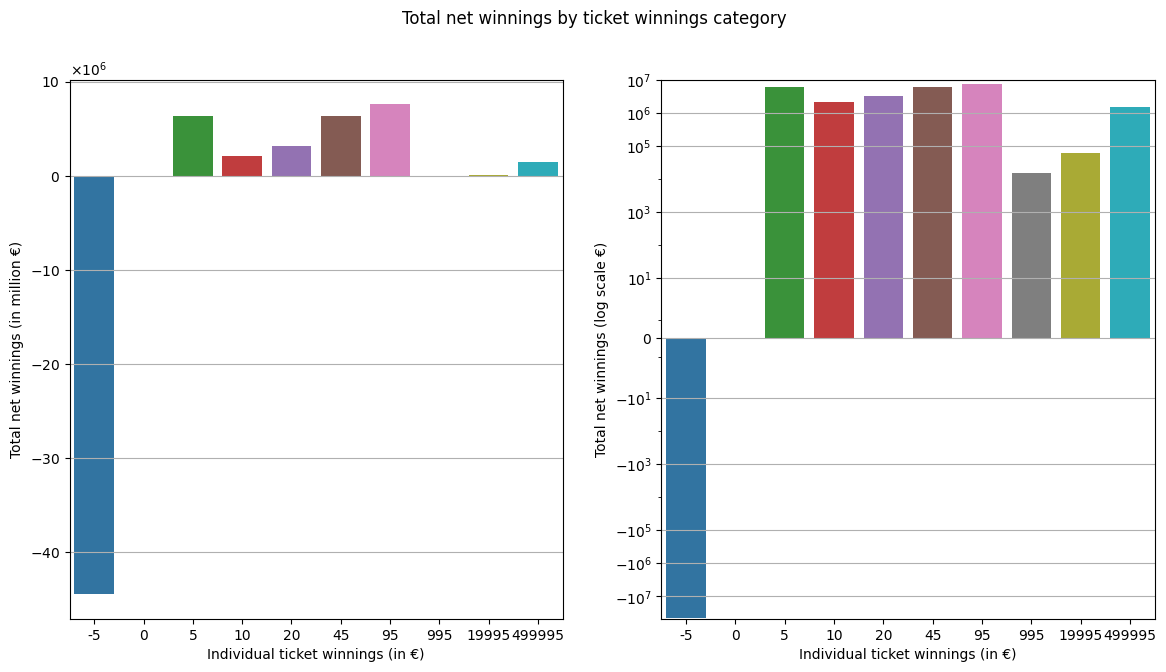

In [19]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(14, 7))
plt.suptitle("Total net winnings by ticket winnings category")

ax1 = plt.subplot(1, 2, 1)
sns.barplot(data=X20, x="net_winnings", y="total_net_winnings")
plt.xlabel("Individual ticket winnings (in €)")
plt.ylabel("Total net winnings (in million €)")

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((6, 6))
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, axis="y")

ax2 = plt.subplot(1, 2, 2)
sns.barplot(data=X20, x="net_winnings", y="total_net_winnings")
plt.xlabel("Individual ticket winnings (in €)")
plt.ylabel("Total net winnings (log scale €)")
plt.yscale("symlog")
plt.yticks([-10000000, -1000000, -100000, -1000, -10, 0, 10, 1000, 100000, 1000000, 10000000])
plt.grid(True, axis="y")

plt.show()
